# Rock Paper Scissors Game:
###  Hand gesture recognition using the Convonutional Neural Networks Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import cv2
import keras
import pickle

Using TensorFlow backend.


In [3]:
DATADIR="C:/Users/MOHIT CHVK/Desktop/new trash/rps"
CATEGORIES=["rock","paper","scissors"]

In [4]:
IMG_SIZE=72

In [5]:
for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        print(path)

C:/Users/MOHIT CHVK/Desktop/new trash/rps\rock
C:/Users/MOHIT CHVK/Desktop/new trash/rps\paper
C:/Users/MOHIT CHVK/Desktop/new trash/rps\scissors


In [6]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:
print(len(training_data))

2188


In [8]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
2
0
0
1
2
1


In [10]:
X=[]
y=[]

In [11]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [12]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [13]:
X.shape

(2188, 72, 72, 1)

In [14]:
len(y)

2188

In [15]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

In [16]:
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [18]:
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

In [19]:
X=X/255.0

In [20]:
X[1]

array([[[0.30980392],
        [0.31372549],
        [0.30980392],
        ...,
        [0.33333333],
        [0.3254902 ],
        [0.31372549]],

       [[0.31764706],
        [0.31764706],
        [0.3254902 ],
        ...,
        [0.3372549 ],
        [0.32941176],
        [0.3254902 ]],

       [[0.31764706],
        [0.32156863],
        [0.3254902 ],
        ...,
        [0.32941176],
        [0.3254902 ],
        [0.32941176]],

       ...,

       [[0.3254902 ],
        [0.33333333],
        [0.32941176],
        ...,
        [0.34117647],
        [0.3372549 ],
        [0.3372549 ]],

       [[0.30980392],
        [0.32941176],
        [0.32941176],
        ...,
        [0.3372549 ],
        [0.33333333],
        [0.3372549 ]],

       [[0.31764706],
        [0.32156863],
        [0.32156863],
        ...,
        [0.3372549 ],
        [0.3372549 ],
        [0.33333333]]])

In [21]:
X.shape

(2188, 72, 72, 1)

In [22]:
model=Sequential()

In [23]:
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))    

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2))) 
          
model.add(Flatten())

model.add(Dense(64))

model.add(Dense(3)) 
model.add(Activation("softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [26]:
model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 1969 samples, validate on 219 samples
Epoch 1/10
1969/1969 [==============================] - 3s 2ms/sample - loss: 0.8934 - acc: 0.5957 - val_loss: 0.6615 - val_acc: 0.7808
Epoch 2/10
1969/1969 [==============================] - 1s 625us/sample - loss: 0.4286 - acc: 0.8466 - val_loss: 0.3661 - val_acc: 0.8721
Epoch 3/10
1969/1969 [==============================] - 1s 625us/sample - loss: 0.2829 - acc: 0.9223 - val_loss: 0.2885 - val_acc: 0.8813
Epoch 4/10
1969/1969 [==============================] - 1s 626us/sample - loss: 0.1883 - acc: 0.9482 - val_loss: 0.1833 - val_acc: 0.9406
Epoch 5/10
1969/1969 [==============================] - 1s 621us/sample - loss: 0.1645 - acc: 0.9462 - val_loss: 0.1771 - val_acc: 0.9543
Epoch 6/10
1969/1969 [==============================] - 1s 623us/sample - loss: 0.1147 - acc: 0.9594 - val_loss: 0.1524 - val_acc: 0.9589
Epoch 7/10
1969/1969 [==============================] - 1s 633us/sample - loss: 0.0960 - acc: 0.9711 - val_loss: 0.1695 - val_a

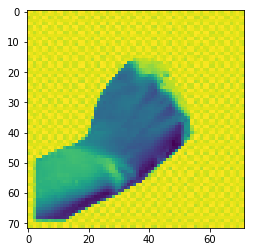

In [48]:
def image(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/rk.jpg'))

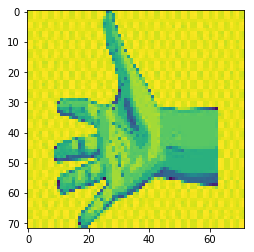

In [51]:
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/pr.jpg'))

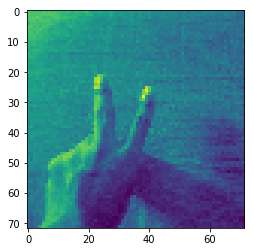

In [56]:
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/msc2.jpg'))

In [57]:
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [58]:
prediction=model.predict([prepare('C:/Users/MOHIT CHVK/Desktop/new trash/msc2.jpg')])
prediction

array([[6.1731577e-28, 9.1648263e-17, 1.0000000e+00]], dtype=float32)

In [59]:
print("It's a gesture of :")
for i in range(0,3):
    if prediction[0][i]==1:
        if i==0:
            print("rock")
        elif i==1:
            print("paper")
        else:
            print("scissors")

It's a gesture of :
scissors


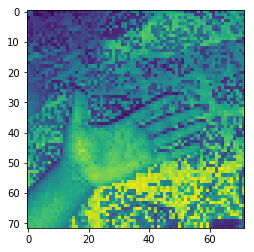

In [60]:
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/mpr.jpg'))

In [62]:
prediction=model.predict([prepare('C:/Users/MOHIT CHVK/Desktop/new trash/mpr.jpg')])
prediction

array([[0., 1., 0.]], dtype=float32)

In [63]:
print("It's a gesture of :")
for i in range(0,3):
    if prediction[0][i]==1:
        if i==0:
            print("rock")
        elif i==1:
            print("paper")
        else:
            print("scissors")

It's a gesture of :
paper
